# Delhivary Feature Engineering, Feature Selection & Reduction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import the dataset
df = pd.read_csv('cleaned_logistics_data.csv')

In [4]:
df.shape

(144867, 24)

In [5]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,NaN,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144867 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144867 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [7]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), '% missing': (df.isnull().mean() * 100).round(2)})
missing_data

,total_missing,% missing
data,0,0.00
trip_creation_time,0,0.00
route_schedule_uuid,0,0.00
route_type,0,0.00
trip_uuid,0,0.00
source_center,0,0.00
source_name,0,0.00
destination_center,0,0.00
destination_name,0,0.00
od_start_time,0,0.00


In [8]:
# droppiing missing data
#df.dropna(subset=['cutoff_timestamp_date','cutoff_timestamp_time'], inplace=True)

# Feature Creation

In [10]:
# Extracting Features like city - place - pin code -state from source and destination name columns
df['source_city'] = df['source_name'].str.split(" ",n=1,expand=True)[0].str.split("-",n=1,expand=True)[0]
df['source_state'] = df['source_name'].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")
df["destination_city"] = df["destination_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df["destination_state"] = df["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")
df["source_pincode"] = df["source_center"].apply(lambda x : x[3:9] )
df["destination_pincode"] = df["destination_center"].apply(lambda x : x[3:9] )

In [11]:
#Change data type of feature
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

In [12]:
# Time taken between 'od start' and 'od_end' 
df["time_taken_btwn_odstart_and_od_end"] = ((df["od_end_time"]-df["od_start_time"])/pd.Timedelta(1,unit="hour"))

In [13]:
# Converting given time duration features into hours
df["start_scan_to_end_scan"] = df["start_scan_to_end_scan"]/60
df["actual_time"] = df["actual_time"]/60
df["osrm_time"] = df["osrm_time"]/60
df["segment_actual_time"] = df["segment_actual_time"]/60
df["segment_osrm_time"] = df["segment_osrm_time"]/60

In [14]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,destination_city,destination_state,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.183333,11.9653,1.272727,Anand_VUNagar_DC,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.150000,9.7590,1.111111,Anand_VUNagar_DC,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.116667,10.8152,2.285714,Anand_VUNagar_DC,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.200000,13.0224,1.750000,Anand_VUNagar_DC,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.083333,3.9153,1.200000,Anand_VUNagar_DC,Gujarat,Khambhat,Gujarat,388121,388620,1.436894


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   data                                144867 non-null  object        
 1   trip_creation_time                  144867 non-null  datetime64[ns]
 2   route_schedule_uuid                 144867 non-null  object        
 3   route_type                          144867 non-null  object        
 4   trip_uuid                           144867 non-null  object        
 5   source_center                       144867 non-null  object        
 6   source_name                         144867 non-null  object        
 7   destination_center                  144867 non-null  object        
 8   destination_name                    144867 non-null  object        
 9   od_start_time                       144867 non-null  datetime64[ns]
 10  od_end_t

In [16]:
# data cleaning in 'source_state' column
df["source_state"] = df["source_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                            "Hub Maharashtra":"Maharashtra"})

In [17]:
df["source_state"].value_counts()

source_state
Haryana                   27499
Maharashtra               21401
Karnataka                 19578
Tamil Nadu                 7494
Gujarat                    7202
Uttar Pradesh              7137
Telangana                  6496
West Bengal                5963
Andhra Pradesh             5539
Rajasthan                  5267
Punjab                     4410
Delhi                      4398
Bihar                      4190
Madhya Pradesh             4021
Assam                      2875
Jharkhand                  2597
Kerala                     2413
Orissa                     2094
Uttarakhand                1162
Himachal Pradesh            587
Goa                         514
Chandigarh                  507
Road Punjab                 294
Arunachal Pradesh           245
Chhattisgarh                229
Jammu & Kashmir             226
Meghalaya                    86
Pondicherry                  49
Nagaland                     40
Dadra and Nagar Haveli       30
Mizoram                    

In [18]:
## data cleaning in 'destination_state' column
df["destination_state"] = df["destination_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                           "Delhi Delhi":"Delhi",
                           "West_Dc Maharashtra":"Maharashtra",
                           "Hub Maharashtra":"Maharashtra"
                                                       })

In [19]:
# some more data cleaning
df["destination_city"].replace({"del":"Delhi"},inplace=True)
df["source_city"].replace({"del":"Delhi"},inplace=True)
df["source_city"].replace({"Bangalore":"Bengaluru"},inplace=True)
df["destination_city"].replace({"Bangalore":"Bengaluru"},inplace=True)
df["destination_city"].replace({"AMD":"Ahmedabad"},inplace=True)
df["destination_city"].replace({"Amdavad":"Ahmedabad"},inplace=True)
df["source_city"].replace({"AMD":"Ahmedabad"},inplace=True)
df["source_city"].replace({"Amdavad":"Ahmedabad"},inplace=True)

# Feature Selection

### Mutual Information (MI Score)

In [22]:
data_model = df[['route_type', 'start_scan_to_end_scan', 'cutoff_factor',
        'actual_distance_to_destination', 'actual_time',
        'osrm_distance', 'factor', 'segment_actual_time',
        'segment_osrm_distance', 'segment_factor',
       'source_city', 'source_state', 'destination_city', 'destination_state',
       'time_taken_btwn_odstart_and_od_end']]
data_model.head()

,route_type,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_distance,factor,segment_actual_time,segment_osrm_distance,segment_factor,source_city,source_state,destination_city,destination_state,time_taken_btwn_odstart_and_od_end
0,Carting,1.433333,9,10.435660,0.233333,11.9653,1.272727,0.233333,11.9653,1.272727,Anand_VUNagar_DC,Gujarat,Khambhat,Gujarat,1.436894
1,Carting,1.433333,18,18.936842,0.400000,21.7243,1.200000,0.166667,9.7590,1.111111,Anand_VUNagar_DC,Gujarat,Khambhat,Gujarat,1.436894
2,Carting,1.433333,27,27.637279,0.666667,32.5395,1.428571,0.266667,10.8152,2.285714,Anand_VUNagar_DC,Gujarat,Khambhat,Gujarat,1.436894
3,Carting,1.433333,36,36.118028,1.033333,45.5620,1.550000,0.350000,13.0224,1.750000,Anand_VUNagar_DC,Gujarat,Khambhat,Gujarat,1.436894
4,Carting,1.433333,39,39.386040,1.133333,54.2181,1.545455,0.100000,3.9153,1.200000,Anand_VUNagar_DC,Gujarat,Khambhat,Gujarat,1.436894


In [23]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Select features and target
X = data_model.copy()
y = df['is_cutoff']  # Target variable


# Encode categorical variables in X
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Calculate Mutual Information Scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create and sort results in a DataFrame
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Display the MI scores
print(mi_scores_df)

                               Feature  MI Score
2                        cutoff_factor  0.371909
3       actual_distance_to_destination  0.232576
8                segment_osrm_distance  0.185922
7                  segment_actual_time  0.095026
9                       segment_factor  0.091741
5                        osrm_distance  0.080412
1               start_scan_to_end_scan  0.068164
10                         source_city  0.065094
12                    destination_city  0.051375
4                          actual_time  0.041159
6                               factor  0.035932
0                           route_type  0.033624
14  time_taken_btwn_odstart_and_od_end  0.024878
11                        source_state  0.019400
13                   destination_state  0.010621


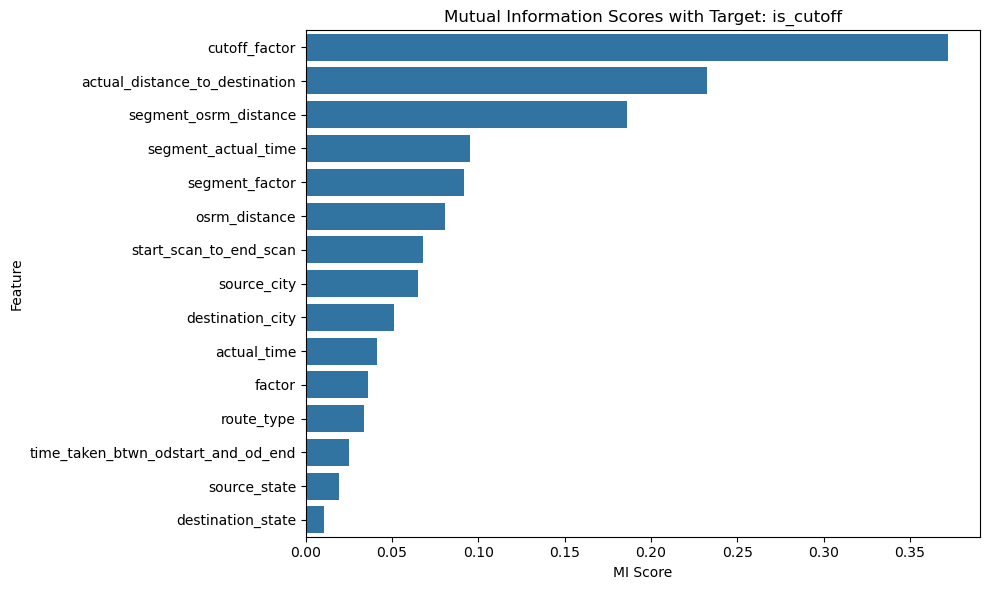

In [24]:
# Visualize MI score
plt.figure(figsize=(10, 6))
sns.barplot(x='MI Score', y='Feature', data=mi_scores_df)
plt.title('Mutual Information Scores with Target: is_cutoff')
plt.tight_layout()
plt.show()

In [25]:
# Feature Selection
# Retain features with MI > 0.05 to reduce dimensionality
selected_features = mi_scores_df[mi_scores_df['MI Score'] > 0.05]['Feature'].tolist()
selected_features

['cutoff_factor',
 'actual_distance_to_destination',
 'segment_osrm_distance',
 'segment_actual_time',
 'segment_factor',
 'osrm_distance',
 'start_scan_to_end_scan',
 'source_city',
 'destination_city']

In [80]:
features_to_save = selected_features + ['is_cutoff', 'data']

In [82]:
# Create new DataFrame
df_selected = df[features_to_save]

In [86]:
# Save to CSV
df_selected.to_csv('selected_features_dataset.csv', index=False)

In [26]:
# Separate Numerical Features
numerical_features = [
    'cutoff_factor',
    'actual_distance_to_destination',
    'segment_osrm_distance',
    'segment_actual_time',
    'segment_factor',
    'osrm_distance',
    'start_scan_to_end_scan',
]
#X_num = data_model[numerical_features]
X_num = X.loc[:, numerical_features]

In [27]:
#  Standardize the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# Feature Reduction using PCA(Principle Component Analysis)

In [29]:
# Apply PCA
from sklearn.decomposition import PCA

# Try explaining 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Check number of components retained
print(f"Original features: {X_scaled.shape[1]}")
print(f"PCA components retained: {X_pca.shape[1]}")

Original features: 7
PCA components retained: 4


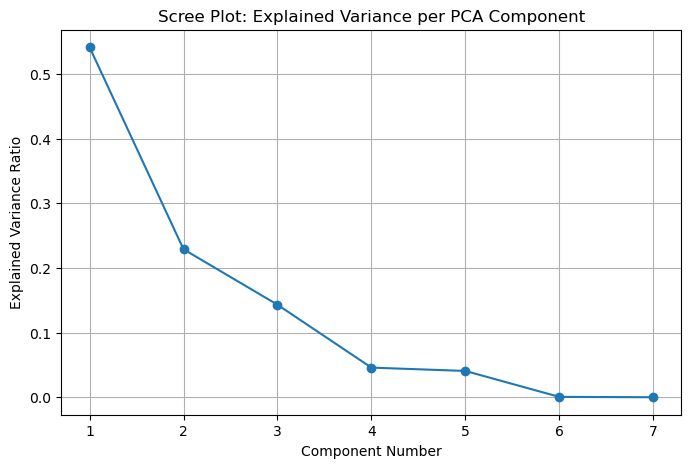

In [30]:
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), pca_full.explained_variance_ratio_, marker='o')
plt.title('Scree Plot: Explained Variance per PCA Component')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()